In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/steven1946/Machine-Learning/main/UAS/experiment.csv')

In [ ]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.0,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.0,0.006711,0.0,1
1,0.000000,0.0,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.0,0.007246,0.0,1
2,0.011696,0.0,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.0,0.000000,0.0,1
3,0.000000,0.0,0.020833,0.000000,0.0,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.0,0.000000,0.0,1
4,0.000000,0.0,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.0,0.000000,0.0,1


Outlier Detection

In [ ]:
z_scores = stats.zscore(df)
z_scores

array([[-0.0427896 , -0.57454216,  1.13461489, ...,  0.34179386,
        -0.49211189, -1.41421356],
       [-0.58148916, -0.57454216, -0.43974027, ...,  0.40989316,
        -0.49211189, -1.41421356],
       [ 0.35729731, -0.57454216,  0.24616297, ..., -0.51254179,
        -0.49211189, -1.41421356],
       ...,
       [ 0.6165144 , -0.57454216, -0.43974027, ..., -0.51254179,
         2.90943485,  1.41421356],
       [-0.58148916,  1.40425033,  1.61796956, ..., -0.51254179,
         3.50619755,  1.41421356],
       [ 0.80241157, -0.57454216, -0.43974027, ..., -0.51254179,
         3.43726126,  1.41421356]])

In [ ]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_wo_outliers = df[filtered_entries]

In [ ]:
df_wo_outliers.shape

(276, 201)

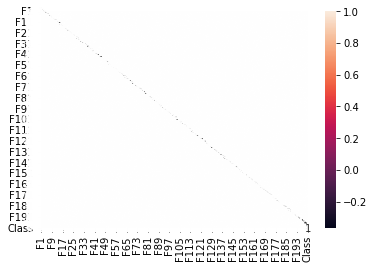

In [ ]:
sns.heatmap(df_wo_outliers.corr(), annot=True)

Semua nominal yang amsih di atas 0.3 diambil

In [ ]:
corr_matrix = df_wo_outliers.corr().abs()

upper = corr_matrix.where((np.triu(np.ones(corr_matrix.shape), k=1) + np.tril(np.ones(corr_matrix.shape), k=-1)).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
df1 = df_wo_outliers.filter(to_drop, axis=1)

In [ ]:
print(to_drop)

['F47', 'F115', 'F132', 'F148', 'F186']


In [ ]:
print(df1.head())

    F47      F115  F132  F148  F186
1   0.0  0.000000   0.0   0.0   0.0
6   0.0  0.004926   0.0   0.0   0.0
27  0.0  0.000000   0.0   0.0   0.0
32  0.0  0.000000   0.0   0.0   0.0
33  0.0  0.000000   0.0   0.0   0.0


In [ ]:
y = df_wo_outliers[['Class']]
X = df_wo_outliers.drop(['Class'], axis=1)

In [ ]:
df1['Class'] = y

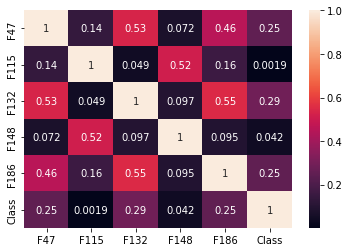

In [ ]:
sns.heatmap(df1.corr(), annot=True)

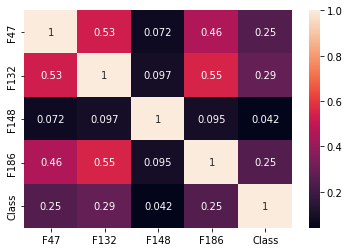

In [ ]:
df1 = df1.drop(['F115'] ,axis=1)
sns.heatmap(df1.corr(), annot=True)

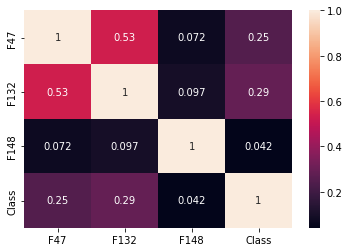

In [ ]:
df1 = df1.drop(['F186'] ,axis=1)
sns.heatmap(df1.corr(), annot=True)

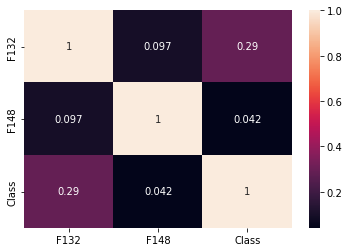

In [ ]:
df1 = df1.drop(['F47'] ,axis=1)
sns.heatmap(df1.corr(), annot=True)

In [ ]:
new_X = df1.drop(['Class'], axis=1)
new_y = df1['Class']

In [ ]:
print(new_X.shape)
print(new_y.shape)

(276, 5)
(276,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(220, 5)
(56, 5)


KNN Method

In [ ]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++", random_state=200).fit(df_wo_outliers).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_wo_outliers, labels,metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 2 is 0.767722658651859
Silhouette score for k(clusters) = 3 is 0.7636568905902792
Silhouette score for k(clusters) = 4 is 0.811007948916478
Silhouette score for k(clusters) = 5 is 0.8615449816471475
Silhouette score for k(clusters) = 6 is 0.6920026383318914
Silhouette score for k(clusters) = 7 is 0.36757231966861487
Silhouette score for k(clusters) = 8 is 0.20981263681839685
Silhouette score for k(clusters) = 9 is 0.2840811325059402
Silhouette score for k(clusters) = 10 is 0.2787724456352727
Silhouette score for k(clusters) = 11 is 0.12064474958631115
Silhouette score for k(clusters) = 12 is 0.1338152684468216


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.38      0.44        21
           2       1.00      0.20      0.33         5
           3       0.25      0.25      0.25         4
           4       0.67      0.67      0.67        15
           5       0.29      0.55      0.37        11

    accuracy                           0.46        56
   macro avg       0.55      0.41      0.41        56
weighted avg       0.54      0.46      0.47        56



SVM Linear Kernel

In [ ]:
svc_pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
svc_lin_params = {'svc__C': [0.01, 0.1, 1, 10], 'svc__kernel': ['linear']}

In [ ]:
svc_lin = GridSearchCV(svc_pipe, svc_lin_params, n_jobs=-1)

In [ ]:
svc_lin.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear']})

In [ ]:
svc_lin.best_params_

{'svc__C': 10, 'svc__kernel': 'linear'}

In [ ]:
lin_pred = svc_lin.predict(X_test)

In [ ]:
print(classification_report(y_test, lin_pred))

              precision    recall  f1-score   support

           1       0.67      0.95      0.78        21
           2       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         4
           4       0.59      0.67      0.62        15
           5       0.43      0.27      0.33        11

    accuracy                           0.61        56
   macro avg       0.54      0.42      0.42        56
weighted avg       0.58      0.61      0.56        56



Comparison

In [ ]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, lin_pred))

              precision    recall  f1-score   support

           1       0.53      0.38      0.44        21
           2       1.00      0.20      0.33         5
           3       0.25      0.25      0.25         4
           4       0.67      0.67      0.67        15
           5       0.29      0.55      0.37        11

    accuracy                           0.46        56
   macro avg       0.55      0.41      0.41        56
weighted avg       0.54      0.46      0.47        56

              precision    recall  f1-score   support

           1       0.67      0.95      0.78        21
           2       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         4
           4       0.59      0.67      0.62        15
           5       0.43      0.27      0.33        11

    accuracy                           0.61        56
   macro avg       0.54      0.42      0.42        56
weighted avg       0.58      0.61      0.56        56



Evaluation

(Di hitung di atas secara berulang)

Jika hanya mengambil yang di atas 0.5, KNN 0.46 dan SVM 0.61

Setelah F115 di drop, KNN 0.57 SVM 0.57

Setelah F186 di drop juga, KNN 0.59 SVM 0.59

Setelah F47 di drop juga, KNN 0.55 SVM 0.55


Berdasarkan percobaan diatas, akurasi yang terbaik ada di SVM ketika tidak ada tambahan data yang di drop yaitu 0.61 tetapi setelah di drop F115 dan F186, didapatkan akurasi terbaik untuk KNN maupun SVM yaitu 0.59